In [37]:
from sklearn.naive_bayes import MultinomialNB 
import os
import skimage as sk
from skimage.filters import gaussian
from skimage.util import random_noise
from skimage.io import imread
from skimage.transform import resize
from skimage.io import imshow
from skimage.io import imsave
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold



In [53]:
img_data = []       # Non-flattened images
img_flattened = []  # Flattened images (needed for noise generation)
img_target = []     # Class belonging to each image

num_img = 100
dir_init = './caltech-101/'

n = 0
# Iterate through all folders in caltech101 file
for category in os.listdir(dir_init):
    
    if(category == '.DS_Store'):
        continue
        
    dir_img = os.path.join(dir_init, category)
    
    total_imgs = os.listdir(dir_img)
    if len(total_imgs) >= 100:       # If there are at least 100 images in the class
        
        classes.append(category)
        n_i = 0
        
        for img in os.listdir(dir_img):
            if(img == '.DS_Store'):
                continue
                
            img = imread(os.path.join(dir_img, img))   # Read the image as a vector 
            img_resized = resize(img, (150, 150, 3))
            img_data.append(img_resized)
            img_flattened.append(img_resized.flatten())
            img_target.append(classes.index(category))
            
            n_i += 1
            if (n_i == num_img):
                break


gaussian_images = {}
gaussian_images[0] = img_flattened

for std in range(1,11):
    temp = []
    for img in img_data:
        temp.append(random_noise(img,var= (std/100),mode='gaussian').flatten())
        
    gaussian_images[std/100] = temp
    

# Lens blur image generation

blur_images = {}
blur_images[1] = img_flattened

for k in range(2,12):
    temp = []
    for img in img_data:
        temp.append(cv2.blur(img,(k,k).flatten()))
        
    blur_images[k] = temp
    
    
# Salt and pepper image generation
    
sp_images = {}
sp_images[0] = img_flattened
for variance in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]:

    temp = []

    for img in img_data:
        temp.append(random_noise(img, amount = variance, mode='s&p').flatten())
        
    sp_images[variance] = temp


SyntaxError: '(' was never closed (4208272487.py, line 57)

In [43]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(img_flattened, img_target, test_size = 0.20,  random_state = 1, stratify = img_target)

# Create model
mnb = MultinomialNB()
mnb.fit(x_train,y_train)


# Create result arrays 
nb_test_acc_gaussian = {}
nb_train_acc_gaussian = {}
nb_test_f_gaussian = {}
nb_train_f_gaussian = {}



for k in gaussian_images.keys():
    
    #Split data
    x_train, x_test, y_train, y_test = train_test_split(gaussian_images[k], img_target, test_size = 0.20,  random_state = 1, stratify = img_target)
    
    nb_test_acc_gaussian[k] = accuracy_score(mnb.predict(x_test),y_test)
    nb_train_acc_gaussian[k] = accuracy_score(mnb.predict(x_train),y_train)
    nb_test_f_gaussian[k] = f1_score(mnb.predict(x_test),y_test,average = 'macro')
    nb_train_f_gaussian[k] = f1_score(mnb.predict(x_train),y_train,average = 'macro')


    
    

In [44]:
print("nb_test_acc_gaussian = ", nb_test_acc_gaussian)
print("nb_train_acc_gaussian = ", nb_train_acc_gaussian)
print("nb_test_f_gaussian = ", nb_test_f_gaussian)
print("nb_train_f_gaussian = ", nb_train_f_gaussian)


nb_test_acc_gaussian =  {0: 0.5625, 0.01: 0.5708333333333333, 0.02: 0.5708333333333333, 0.03: 0.5625, 0.04: 0.5666666666666667, 0.05: 0.5625, 0.06: 0.55, 0.07: 0.5583333333333333, 0.08: 0.55, 0.09: 0.55, 0.1: 0.5375}
nb_train_acc_gaussian =  {0: 0.6166666666666667, 0.01: 0.61875, 0.02: 0.61875, 0.03: 0.6208333333333333, 0.04: 0.621875, 0.05: 0.6177083333333333, 0.06: 0.6145833333333334, 0.07: 0.6083333333333333, 0.08: 0.60625, 0.09: 0.6083333333333333, 0.1: 0.6}
nb_test_f_gaussian =  {0: 0.5538428191284266, 0.01: 0.566119094645432, 0.02: 0.5676946351211057, 0.03: 0.5620965980388473, 0.04: 0.5643320976796401, 0.05: 0.5640971019403515, 0.06: 0.5542661167325236, 0.07: 0.5612813684431534, 0.08: 0.5545225834056218, 0.09: 0.5580340178171966, 0.1: 0.5452657569311296}
nb_train_f_gaussian =  {0: 0.6088925473201404, 0.01: 0.6122826060175265, 0.02: 0.6132984961055445, 0.03: 0.6164462485458285, 0.04: 0.6181999503787605, 0.05: 0.6152269074614599, 0.06: 0.6134109339718786, 0.07: 0.6086197595842058, 

In [47]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(img_flattened, img_target, test_size = 0.20,  random_state = 1, stratify = img_target)

# Create model
mnb = MultinomialNB()
mnb.fit(x_train,y_train)


# Create result arrays 
nb_test_acc_blur = {}
nb_train_acc_blur = {}
nb_test_f_blur = {}
nb_train_f_blur = {}



for k in blur_images.keys():
    
    #Split data
    x_train, x_test, y_train, y_test = train_test_split(blur_images[k], img_target, test_size = 0.20,  random_state = 1, stratify = img_target)
    
    nb_test_acc_blur[k] = accuracy_score(mnb.predict(x_test),y_test)
    nb_train_acc_blur[k] = accuracy_score(mnb.predict(x_train),y_train)
    nb_test_f_blur[k] = f1_score(mnb.predict(x_test),y_test,average = 'macro')
    nb_train_f_blur[k] = f1_score(mnb.predict(x_train),y_train,average = 'macro')

In [48]:
print("nb_test_acc_blur = ", nb_test_acc_blur)
print("nb_train_acc_blur = ", nb_train_acc_blur)
print("nb_test_f_blur = ", nb_test_f_blur)
print("nb_train_f_blur = ", nb_train_f_blur)

nb_test_acc_blur =  {1: 0.5625, 2: 0.5625, 3: 0.5625, 4: 0.5625, 5: 0.5625, 6: 0.5583333333333333, 7: 0.5375, 8: 0.5291666666666667, 9: 0.5166666666666667, 10: 0.5083333333333333, 11: 0.5125}
nb_train_acc_blur =  {1: 0.6166666666666667, 2: 0.61875, 3: 0.6135416666666667, 4: 0.6145833333333334, 5: 0.60625, 6: 0.6010416666666667, 7: 0.5947916666666667, 8: 0.5833333333333334, 9: 0.5677083333333334, 10: 0.5520833333333334, 11: 0.5447916666666667}
nb_test_f_blur =  {1: 0.5538428191284266, 2: 0.5538086381941033, 3: 0.5538428191284266, 4: 0.5538086381941033, 5: 0.5538428191284266, 6: 0.5509824670752493, 7: 0.5317391853969387, 8: 0.523786829659354, 9: 0.5115529215398739, 10: 0.5027269639657265, 11: 0.5061241964957309}
nb_train_f_blur =  {1: 0.6088925473201404, 2: 0.6111574745235233, 3: 0.6058349385350396, 4: 0.6069128110565026, 5: 0.5993485457638926, 6: 0.5945046153960442, 7: 0.5885316878493656, 8: 0.5779751250800321, 9: 0.5629045391683449, 10: 0.5474601972620609, 11: 0.5373112957244537}


In [50]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(img_flattened, img_target, test_size = 0.20,  random_state = 1, stratify = img_target)

# Create model
mnb = MultinomialNB()
mnb.fit(x_train,y_train)


# Create result arrays 
nb_test_acc_sp = {}
nb_train_acc_sp = {}
nb_test_f_sp = {}
nb_train_f_sp = {}



for k in sp_images.keys():
    
    #Split data
    x_train, x_test, y_train, y_test = train_test_split(sp_images[k], img_target, test_size = 0.20,  random_state = 1, stratify = img_target)
    
    nb_test_acc_sp[k] = accuracy_score(mnb.predict(x_test),y_test)
    nb_train_acc_sp[k] = accuracy_score(mnb.predict(x_train),y_train)
    nb_test_f_sp[k] = f1_score(mnb.predict(x_test),y_test,average = 'macro')
    nb_train_f_sp[k] = f1_score(mnb.predict(x_train),y_train,average = 'macro')
    

In [51]:
print("nb_test_acc_sp = ", nb_test_acc_sp)
print("nb_train_acc_sp = ", nb_train_acc_sp)
print("nb_test_f_sp = ", nb_test_f_sp)
print("nb_train_f_sp = ", nb_train_f_sp)

nb_test_acc_sp =  {0: 0.5625, 0.05: 0.5541666666666667, 0.1: 0.5541666666666667, 0.15: 0.5625, 0.2: 0.55, 0.25: 0.5458333333333333, 0.3: 0.5291666666666667, 0.35: 0.5041666666666667, 0.4: 0.4583333333333333, 0.45: 0.425, 0.5: 0.425}
nb_train_acc_sp =  {0: 0.6166666666666667, 0.05: 0.6197916666666666, 0.1: 0.6208333333333333, 0.15: 0.6229166666666667, 0.2: 0.6145833333333334, 0.25: 0.6072916666666667, 0.3: 0.5854166666666667, 0.35: 0.5479166666666667, 0.4: 0.5083333333333333, 0.45: 0.478125, 0.5: 0.46458333333333335}
nb_test_f_sp =  {0: 0.5538428191284266, 0.05: 0.5505018929283635, 0.1: 0.5548492250089713, 0.15: 0.5647695913714219, 0.2: 0.554553187350725, 0.25: 0.5566349393289959, 0.3: 0.547896799590756, 0.35: 0.5186617956838545, 0.4: 0.4594441519070496, 0.45: 0.42875783503794956, 0.5: 0.4346527908443814}
nb_train_f_sp =  {0: 0.6088925473201404, 0.05: 0.6132577889926074, 0.1: 0.6173164207406098, 0.15: 0.6217742490104076, 0.2: 0.6172604568871417, 0.25: 0.6139119616903733, 0.3: 0.59611173

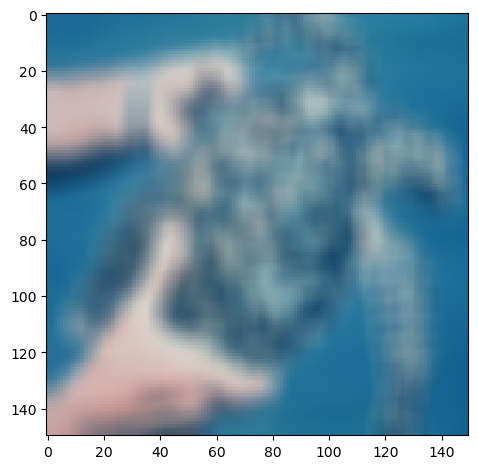

In [54]:
for k in range(2,12):
    temp = []
    for img in img_data:
        temp.append(cv2.blur(img,(k,k)))
        
    blur_images[k] = temp

imshow(blur_images[10][0])